In [ ]:
## install NLTK 
conda install nltk

In [2]:
import nltk

NLTK comes with bunch of datasets that are necessary in order for it to operate in certain ways in which you can do is call nltk.download_shell() and it has a little interactive shell you can use.

And what we need to do is if you call 'l' for List (There are some options Download, Update, Config, Help ..)
Type l and hit enter and it will show you a list of the available packages and you keep hitting enter to continue through the list. You will see there is quite a few packages. What we are going to do is just download one of these packages. You could just say .download to download all of them, but the one we are looking for is the stopwords package. We first type 'd' to download and then type stopwords and hit enter.

In [2]:
#nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
# We will use a dataset from the UCI datasets
# We are gonna use SMS Spam Collection DAtaset. Basically it is a bunch of techs SMS data it's been classified to
# either be spam or to be actual what's known as ham which is just a normal text message and we are going to
# use this data to built a spam detection filter with Python

In [3]:
import pandas as pd

In [4]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','message']) # we specified the seperater as a \t

In [5]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Let's go ahead and do some exploratory data analysis of some data visualization and some statistical information
# about our data .
messages.describe()
# There is 2 unique labels , There is actually less unique messages versus the actual message count which means
# We have repeated messages in there and that makes sense because some of them probably are things like "Sorry I'll call you later"
# or Hey or Yes or No.. very common text messages to send. 

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# Now what we can do is groupby to use the describe method by the actual label and this way we can begin to
# think about the features that seperate ham and spam
# So we are going to start with a kind of higher level view of this data just to get intuition what actually
# seperates a spam message versus a ham message ..
messages.groupby('label').describe()
# We can see How many ham and spam message we have . Most popular ham message is Sorry, I ll call later.

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
# As we continue our analysis, we want to start thinking about the features we are going to be using.
# With NLP, a large part of this is going to be feature engineering 
# The better your domain knowledge on the data, the better your ability to engineer more features from it.

# Let's create a new column to detect how long the text messages are. 
messages['length'] = messages['message'].apply(len)

In [9]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%matplotlib inline

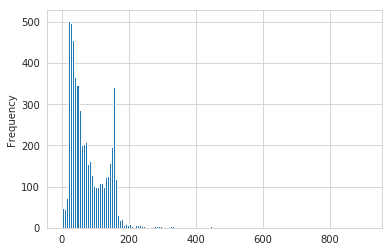

In [12]:
sns.set_style('whitegrid')
messages['length'].plot.hist(bins=150)
# Here we can see the distribution of the message length. You can play around with the binsize
# As you begin to increase binsize there seems to be bimodal behaviour. There is a peak over here at the lower end
# and the peak over here at the higher end.
# It looks like text length maybe a good feature to think about.
# Let's try to explain why the x axis goes to 800ish and this must mean that there's some really
# long text message

In [13]:
messages['length'].describe() # 910 character is max message

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fccddf42748>,
      dtype=object)

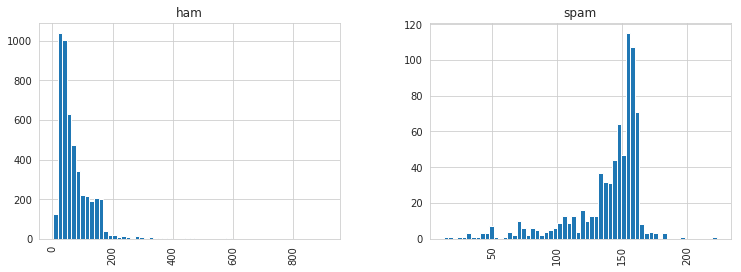

In [14]:
# We will try to see if message length is a distinguishing feature between ham and spam.
# Let's go ahead and plot the histogram of messages
messages.hist(column='length', by='label', bins=60, figsize=(12,4))
# We can see basically kind of pandas's own version of Facet grid where we have ham vs spam, 2 separate columns 
# We've been able to discover a trend that spam messages tend to have more characters
# So if you look here at the left where it is ham, we'are looking at an average somewhere between 0-200
# And it looks like it is centered much closer to about 50ish range.
# And if you look at spam text messages , these are actually tend to be centered around 150. 
# So as we have seen here just visually it looks like length is a good feature to distinguish a spam message vs a ham message

In [34]:
### PART 2 ###

In [15]:
## We will start learning about text preprocessing. since our main issue for our data is that it's all in text format
## or strings, the classification algorithms actually need some sort of
## numerical feature vector in order to perform the classification tasks.
## There are many actual methods where you can convert a corpus of strings to a vector format. In the simplest
## approach is what is known as "bag of words" where each unique word in the text will be represented by one number
## We will convert the raw messages (a sequence of characters) into vectors a (sequence of numbers)
## That is the first step we are going to write a function that will split a message into its individual words and return a list
## We are also going to remove very common words like the, a, if etc. These are known as stopwords and that's what 
## we are going to be using NLTK library. 
## We are also going to take adv. of Python's built-in string library.
import string


In [16]:
# Now let's go ahead and see how we can remove stop words.
# We can import a list of English stop words from NLTK 
from nltk.corpus import stopwords

In [18]:
# When we run this, it will produce a list of all the english stopwords.
# So these are just very common words that don't really tell you any distinguishing features
# So these are such common words that when you are trying to do a spam or ham detection or really any sort of 
# classification of text data. These words are so common that they're probably not going to be very helpful 
# as far as trying to distinguish one source of text from another.
stopwords.words('english')

In [19]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """

    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [20]:
## What we are going to do is tokenize these messages and tokenization is just a term you use to describe
## the process what we just did.
## Converting a normal text string into a list of tokens and tokens are just the words we actually want. Clean version of the words

messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
## Basically what happens is we remove any stopwords and we create a list of these tokens, the important words we want
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [61]:
# And currently we have the messages as lists of tokens and now we need to convert each of those messages into
# a vector that scikit learn's algorithm models can work with.
# What we are going to do is convert each message which is again represented by a list of tokens into a vector
# so that the machine learning models can understand.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
# There is lots of arguments and parameters that can ve passed to the CountVectorizer
# And in this case we will just specify the analyzer to be our own previously defined function

In [23]:
# We create a very large matrix. All the rows or words every single word in the messages in all the columns or every single message
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [24]:
print(len(bow_transformer.vocabulary_)) # this will just print the total number of vocab words 
# We have around 11000 words in our vocabulary and what we can do is to take one sample text message
# and get its bag of words count as a vector putting to use our new bow_transformer, our bag of words transformer

11425


In [25]:
mess4 = messages['message'][3]

In [26]:
print(mess4)

U dun say so early hor... U c already then say...


In [27]:
bow4 = bow_transformer.transform([mess4])

In [28]:
print(bow4)
# This means there are essentially seven unique words in message 4 and that is after removing the common stop words
# and then two of them appear twice and the rest only once. 

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [29]:
# We can go ahead and check and confirm which ones appear twice
# And the way to do that is by again from your bag of words transformer you can call the get_feature_names method
# then type in whatever index occurs here so for example we copy 4068 and paste that 
# U shows up twice
bow_transformer.get_feature_names()[4068]

'U'

In [30]:
bow_transformer.get_feature_names()[9554]

'say'

In [31]:
### PART 3 ### 
# We created a bag of words transformer and we explored it an example message 
# and saw how we can see how many times specific word counts show up in its message
# We can actually also use the dot transform method on our bag of words transformed object and transform the entire
# dataframe of messages
messages_bow = bow_transformer.transform(messages['message'])

In [32]:
print('Shape of the Sparse Matrix: ', messages_bow.shape)

Shape of the Sparse Matrix:  (5572, 11425)


In [33]:
messages_bow.nnz ## amount of the non zero occurences

50548

In [34]:
## This is basically just comparing the number of non-zeros messages versus the actual total number of messages
## And this kind of gives you an idea of how many zeros there are in your actual matrix 
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [35]:
# The term weight and normalization can be done with TF-IDF
# Remember that term frequency inverse document frequency 
from sklearn.feature_extraction.text import TfidfTransformer

In [36]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [37]:
tfidf4 = tfidf_transformer.transform(bow4)

In [38]:
print(tfidf4) # basically you could just interpret these numbers as a weight value for each of these words versus the actual document

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [39]:
# Now we finally have the messages represented as numerical vectors above.
# we can train our spam ham classifier, We will use Naive Bayes Classifier
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [40]:
from sklearn.model_selection import train_test_split

In [44]:
msg_train, msg_test, label_train, label_test = train_test_split(messages_tfidf,messages['label'], test_size=0.3)

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
spam_detect_model = MultinomialNB().fit(msg_train, label_train)

In [47]:
predictions = spam_detect_model.predict(msg_test)

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1441
        spam       1.00      0.66      0.80       231

   micro avg       0.95      0.95      0.95      1672
   macro avg       0.97      0.83      0.89      1672
weighted avg       0.96      0.95      0.95      1672

